# **Тема 2. Моделирование связи частотного и классического определения вероятности**

Приведите пример, показывающий связь частотного и классического определения вероятности с помощью моделирования (на примере задачи про красно-синие шары или задачи о сумме очков на двух кубиках). Графически показать стремление частотной вероятности к классической при увеличении числа опытов.

## **Задача**

Имеется колода из 32 карт, состоящая из 4 мастей по 8 карт.
Из колоды случайным образом выбираются 4 карты. Требуется найти вероятность того, что в руке окажется хотя бы 2 карты одной масти.

## **Расчет по классическому определению**

Рассмотрим событие $A$ — хотя бы две карты в раздаче оказались одной масти.

Общее число возможных раздач — число комбинаций четырех карт из 32:

$$
N = C_{32}^4
$$

Воспользуемся противоположным событием $\overline{A}$ — все карты в раздаче имеют разную масть.

$$
N_\overline{A} = C_{8}^1 \cdot C_{8}^1 \cdot C_{8}^1 \cdot C_{8}^1 = 8^4
$$

Классическая вероятность того, что хотя бы две карты одной масти:

$$
P(\text{A}) = 1 - \frac{8^4}{C_{32}^4} = 1 - \frac{4096}{35960} \approx 0.886
$$

## **Моделирование**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

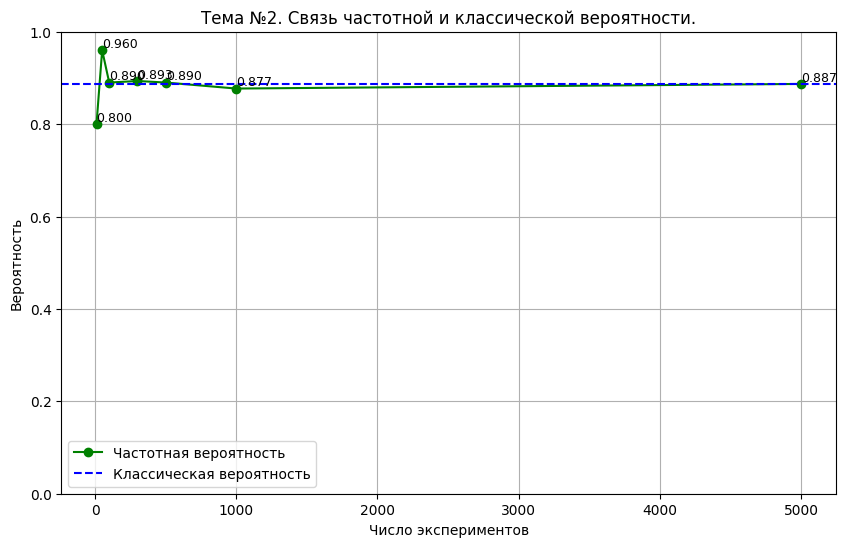

Классическая вер. ≈ 0.886


In [28]:
total_comb = comb(32, 4)
prob = 1 - (comb(8, 1)**4 / total_comb)

deck = np.arange(32)

experiments = [10, 50, 100, 300, 500, 1000, 5000]
frequencies = []


def dealing(count):
    success = 0

    def get_suit(card):
        return card // 8

    for _ in range(count):
        hand = np.random.choice(deck, size=4, replace=False)
        suits_in_hand = [get_suit(card) for card in hand]

        unique, counts = np.unique(suits_in_hand, return_counts=True)
        if np.any(counts >= 2):
            success += 1

    freq = success / count
    frequencies.append(freq)


for n in experiments:
    dealing(n)


plt.figure(figsize=(10, 6))
plt.plot(experiments, frequencies, c='g', marker='o', linestyle='-', label='Частотная вероятность')
for x, y in zip(experiments, frequencies):
    plt.text(x, y, f"{y:.3f}", fontsize=9, ha='left', va='bottom')

plt.axhline(y=prob, color='b', linestyle='--', label='Классическая вероятность')

plt.title('Тема №2. Связь частотной и классической вероятности.')
plt.xlabel('Число экспериментов')
plt.ylabel('Вероятность')

plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.show()

print(f'Классическая вер. ≈ {prob:.3f}')